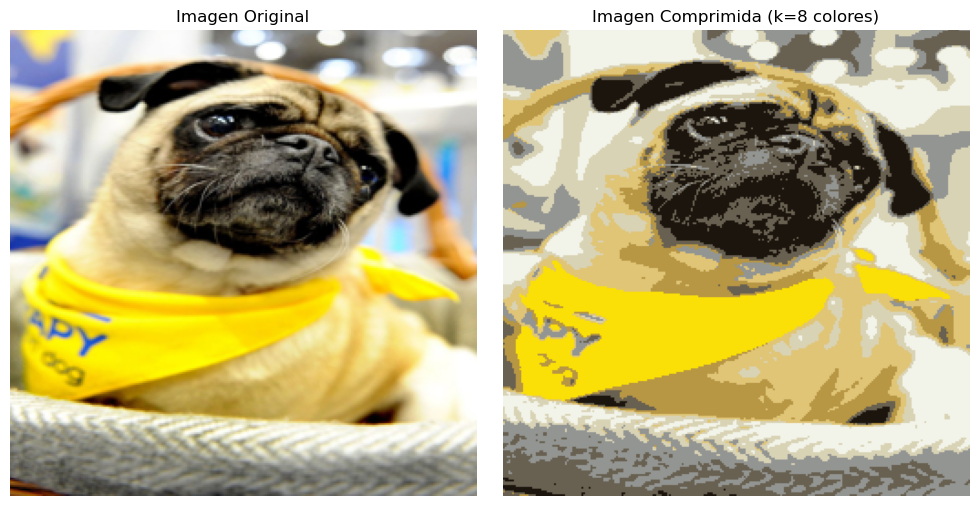

In [1]:
import requests
import io
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.cluster import KMeans

# 1. Descargar la imagen de Internet
# (usa cualquier URL válida que apunte a una imagen)
image_url = "https://imgs.search.brave.com/LhvNSTCBGqCn-B_xW49OTG1ZXRA-nnSHUyGuepsLblo/rs:fit:860:0:0:0/g:ce/aHR0cHM6Ly9oaXBz/LmhlYXJzdGFwcHMu/Y29tL2doay5oLWNk/bi5jby9hc3NldHMv/MTgvMDgvZG91Zy10/aGUtcHVnLmpwZz9j/cm9wPTEuMHh3OjF4/aDtjZW50ZXIsdG9w/JnJlc2l6ZT05ODA6/Kg"
response = requests.get(image_url)
image = Image.open(io.BytesIO(response.content))

# (Opcional) Reducir el tamaño para acelerar los cálculos
image = image.resize((256, 256))
image_np = np.array(image)

# Guardamos las dimensiones para reconstruir
w, h, c = image_np.shape  # ancho, alto, canales (RGB)

# 2. Preparar los datos para k-Means
# Aplanamos la imagen a (n_pixels, 3)
X = image_np.reshape(-1, 3).astype(float)

# 3. Aplicar k-Means
# Elige k = 8 como ejemplo (8 colores en la paleta final)
k = 8
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

centroids = kmeans.cluster_centers_  # colores representativos
labels = kmeans.labels_              # cada píxel -> [0..k-1]

# 4. Reconstruir la imagen comprimida
compressed_pixels = centroids[labels].reshape(w, h, c).astype(np.uint8)
compressed_img = Image.fromarray(compressed_pixels)

# 5. Mostrar resultado
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(image)
axs[0].set_title("Imagen Original")
axs[0].axis('off')

axs[1].imshow(compressed_img)
axs[1].set_title(f"Imagen Comprimida (k={k} colores)")
axs[1].axis('off')

plt.tight_layout()
plt.show()
